In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("Bali.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  365 non-null    datetime64[ns]
 1   Tn       353 non-null    float64       
 2   Tx       358 non-null    float64       
 3   Tavg     363 non-null    float64       
 4   RH_avg   363 non-null    float64       
 5   RR       231 non-null    float64       
 6   ss       360 non-null    float64       
 7   ff_x     363 non-null    float64       
 8   ddd_x    363 non-null    float64       
 9   ff_avg   363 non-null    float64       
 10  ddd_car  363 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 31.5+ KB


<ipython-input-2-574b8faf6b3c>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,25.0,33.8,0.2,28.7
1,2023-02-01,25.0,33.8,5.4,27.5
2,2023-03-01,25.0,32.6,0.8,28.6
3,2023-04-01,26.2,32.6,0.0,29.3
4,2023-05-01,22.6,33.0,2.5,28.4
...,...,...,...,...,...
360,2023-12-16,25.6,33.8,4.0,29.1
361,2023-12-17,26.2,32.6,0.0,28.7
362,2023-12-18,25.4,32.8,NaN,28.4
363,2023-12-19,24.0,32.4,NaN,28.5


In [4]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

22

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,25.0,33.8,0.2,28.7
1,31,31,2023-01-02,24.2,32.8,1.3,28.6
2,59,60,2023-01-03,23.8,32.0,4.9,28.1
3,90,92,2023-01-04,23.6,30.4,NaN,26.3
4,120,123,2023-01-05,25.0,33.0,0.2,28.3
...,...,...,...,...,...,...,...
349,349,360,2023-12-16,25.6,33.8,4.0,29.1
350,350,361,2023-12-17,26.2,32.6,0.0,28.7
351,351,362,2023-12-18,25.4,32.8,NaN,28.4
352,352,363,2023-12-19,24.0,32.4,NaN,28.5


In [8]:
#cek null
df1.isnull().sum()

level_0      0
index        0
Tanggal      0
Tn          12
Tx           6
RR         130
Tavg         2
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
ma = df1['Tavg'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       2
dtype: int64

In [10]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

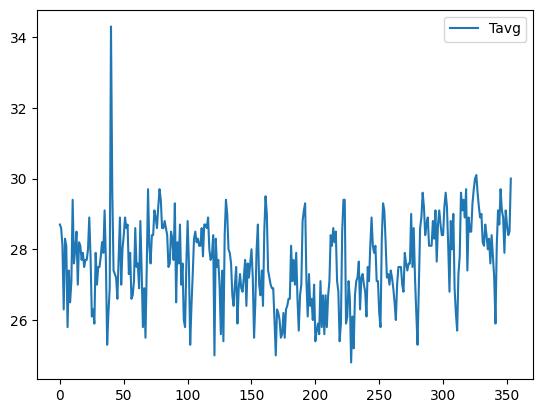

In [11]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

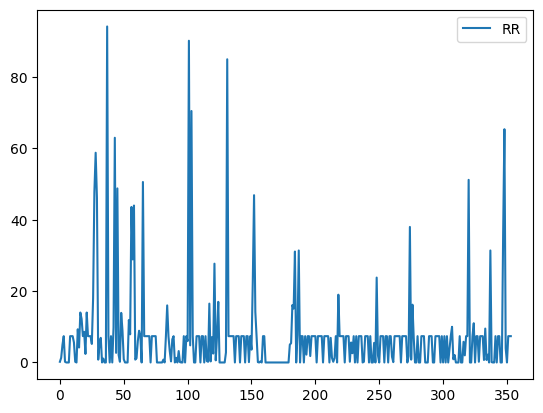

In [12]:
#plotting tavg
df1[['RR']].plot()

In [13]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,25.0,33.8,0.200000,28.7,32.8,28.6,1.300000
1,31,31,2023-01-02,24.2,32.8,1.300000,28.6,32.0,28.1,4.900000
2,59,60,2023-01-03,23.8,32.0,4.900000,28.1,30.4,26.3,7.379018
3,90,92,2023-01-04,23.6,30.4,7.379018,26.3,33.0,28.3,0.200000
4,120,123,2023-01-05,25.0,33.0,0.200000,28.3,32.0,28.1,0.000000
...,...,...,...,...,...,...,...,...,...,...
349,349,360,2023-12-16,25.6,33.8,4.000000,29.1,32.6,28.7,0.000000
350,350,361,2023-12-17,26.2,32.6,0.000000,28.7,32.8,28.4,7.379018
351,351,362,2023-12-18,25.4,32.8,7.379018,28.4,32.4,28.5,7.379018
352,352,363,2023-12-19,24.0,32.4,7.379018,28.5,32.4,30.0,7.379018


In [14]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,0.200000,28.7,28.6,1.300000
1,1.300000,28.6,28.1,4.900000
2,4.900000,28.1,26.3,7.379018
3,7.379018,26.3,28.3,0.200000
4,0.200000,28.3,28.1,0.000000
...,...,...,...,...
349,4.000000,29.1,28.7,0.000000
350,0.000000,28.7,28.4,7.379018
351,7.379018,28.4,28.5,7.379018
352,7.379018,28.5,30.0,7.379018


In [15]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,0.200000,28.7,28.6,1.300000
1,1.300000,28.6,28.1,4.900000
2,4.900000,28.1,26.3,7.379018
3,7.379018,26.3,28.3,0.200000
4,0.200000,28.3,28.1,0.000000
...,...,...,...,...
348,65.400000,27.9,29.1,4.000000
349,4.000000,29.1,28.7,0.000000
350,0.000000,28.7,28.4,7.379018
351,7.379018,28.4,28.5,7.379018


In [16]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,0.200000,28.7,28.6,1.300000,0
1,1.300000,28.6,28.1,4.900000,1
2,4.900000,28.1,26.3,7.379018,2
3,7.379018,26.3,28.3,0.200000,3
4,0.200000,28.3,28.1,0.000000,4
...,...,...,...,...,...
348,65.400000,27.9,29.1,4.000000,348
349,4.000000,29.1,28.7,0.000000,349
350,0.000000,28.7,28.4,7.379018,350
351,7.379018,28.4,28.5,7.379018,351


In [18]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [19]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [20]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test

,Indeks,Tavg
282,282,28.6
283,283,28.9
284,284,29.6
285,285,29.2
286,286,28.4
...,...,...
348,348,27.9
349,349,29.1
350,350,28.7
351,351,28.4


In [22]:
#testing
pred1 = lr.predict(X_test)
pred1

array([27.66856382, 27.79441925, 28.09049914, 27.91846175, 27.5761999 ,
       27.70205532, 27.78535463, 27.44309278, 27.44127986, 27.43946694,
       27.73554683, 27.52095332, 27.85958933, 27.24180081, 27.68573902,
       27.85415056, 27.68211318, 27.5526319 , 27.55081898, 27.88945499,
       28.05786653, 27.88582914, 27.41589894, 26.86085651, 27.71016591,
       27.36790406, 27.7916523 , 26.89616094, 26.5964552 , 26.3818617 ,
       27.06094663, 27.27191429, 28.03611146, 27.82151796, 27.94737338,
       27.73277988, 28.07141588, 27.09081229, 27.72734111, 27.55530372,
       27.5534908 , 27.89212681, 28.06053835, 28.18639377, 28.22713697,
       28.01254347, 27.84050608, 27.71102481, 27.751768  , 27.40950615,
       27.36513711, 27.61866089, 27.48917961, 27.31714223, 27.44299765,
       27.14329192, 27.48192792, 27.2247783 , 26.96762869, 26.41258625,
       27.34700789, 27.77075612, 27.59871874, 28.02246697, 27.76531736,
       27.6783922 , 27.25101812, 27.75987859, 27.5878412 , 27.45

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

1.1117607912638054 1.5497944506363281


In [24]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,28.6
283,283,28.9
284,284,29.6
285,285,29.2
286,286,28.4
...,...,...
348,348,27.9
349,349,29.1
350,350,28.7
351,351,28.4


In [25]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,27.668564
283,27.794419
284,28.090499
285,27.918462
286,27.576200
...,...
348,27.251018
349,27.759879
350,27.587841


In [26]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-26-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,28.7,NaN
1,28.6,NaN
2,28.1,NaN
3,26.3,NaN
4,28.3,NaN
...,...,...
348,27.9,27.251018
349,29.1,27.759879
350,28.7,27.587841
351,28.4,27.458360


<Axes: >

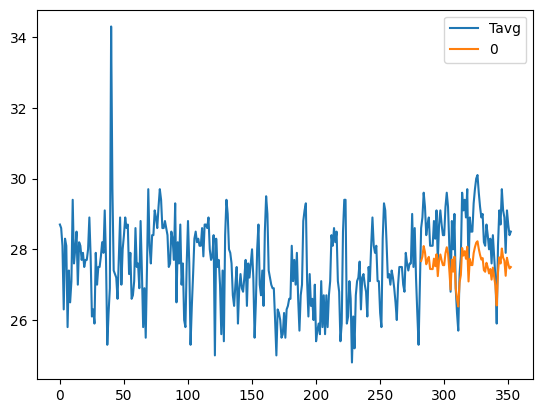

In [27]:
kan.plot()

In [28]:
new_data = [[354,28.5],[355,28.5],[356,28.5],[357,28.5],[358,28.5],[359,28.5],[360,28.5]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([27.49547728, 27.49366436, 27.49185143, 27.49003851, 27.48822559,
       27.48641267, 27.48459974])

In [29]:
kan.to_json('Prediksi Bali.json')